<a href="https://colab.research.google.com/github/shark12000/CDA/blob/main/CDA_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [ ]:
import numpy as np # array and math operations
import pandas as pd # tobular data

import matplotlib.pyplot as plt # charts and graphs
import seaborn as sns # statistical plots

from scipy.stats import zscore, chi2 # Standardizes data by converting values to “how many standard deviations” they are from the mean. chi2 gives the chi-squared distribution for statistical tests
from scipy.spatial.distance import mahalanobis #  Calculates a distance between points that accounts for correlations in the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # libraries for rescaling features
from sklearn.compose import ColumnTransformer # ppplies different preprocessing steps to different columns
from sklearn.pipeline import Pipeline # chains preprocessing into one workflow
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture # clustering algorithms

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('HR_data.csv')

df.head()

# Deduplicate
df = df.drop_duplicates()

In [ ]:
df.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df['Cohort'] = df['Cohort'].astype(str)
df['Round']  = df['Round'].astype(str)
df['Phase']  = df['Phase'].astype(str)

In [ ]:
df_clean = df.dropna(axis=0, how='any').reset_index(drop=True)
df = df_clean
df = df.drop(columns=['Individual'])
df['Puzzler'] = df['Puzzler'].astype('category')

In [ ]:
# Identify numeric vs. categorical columns
numeric_cols     = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print(f"Number of numeric features:     {len(numeric_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")
print("Numeric columns:",     list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

Number of numeric features:     62
Number of categorical features: 4
Numeric columns: ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT', 'Frustrated', 'upset

In [ ]:
# Build preprocessing pipelines

# Numeric pipeline
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Single transformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Fit & transform
X_proc = preprocessor.fit_transform(df)

print("Processed shape:", X_proc.shape)

Processed shape: (307, 77)


In [ ]:
cols = preprocessor.get_feature_names_out()

num_cols = numeric_cols
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
final_cols = list(num_cols) + list(cat_cols)

proc_df = pd.DataFrame(X_proc, columns=final_cols)
proc_df.describe()

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,Phase_phase2,Phase_phase3,Puzzler_0,Puzzler_1,Cohort_D1_1,Cohort_D1_2,Cohort_D1_3,Cohort_D1_4,Cohort_D1_5,Cohort_D1_6
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,...,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,3.355984e-16,-1.157236e-16,-3.182398e-17,-1.087802e-15,-4.976114e-16,4.455358e-16,1.012581e-17,-2.893089e-17,-1.706923e-16,1.504406e-16,...,0.338762,0.335505,0.495114,0.504886,0.299674,0.234528,0.153094,0.156352,0.078176,0.078176
std,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,...,0.474062,0.472938,0.500792,0.500792,0.458863,0.424395,0.360666,0.363781,0.268886,0.268886
min,-1.843366e+00,-1.931609e+00,-1.136672e+00,-2.129260e+00,-1.417149e+00,-2.351321e+00,-9.468858e-01,-3.185402e+00,-5.112007e+00,-9.419102e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.535293e-01,-6.158394e-01,-6.819473e-01,-7.030586e-01,-6.888850e-01,-6.641215e-01,-5.523108e-01,-6.375741e-01,-2.921063e-01,-4.844995e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.586261e-01,-1.560429e-01,-3.253694e-01,-1.272163e-01,-2.806201e-01,-1.671020e-01,-2.385938e-01,-2.237616e-02,2.929684e-01,-2.280322e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.166784e-01,4.603240e-01,3.014220e-01,5.365572e-01,4.067334e-01,5.454978e-01,1.618886e-01,7.243575e-01,6.760530e-01,2.124570e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.433785e+00,7.472530e+00,5.101919e+00,4.526704e+00,4.482378e+00,5.381914e+00,7.532533e+00,3.491064e+00,1.240232e+00,1.201894e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_original = df.copy()
df = proc_df

In [ ]:
print(df_clean['Cohort'].unique())

['D1_4' 'D1_6' 'D1_1' 'D1_2' 'D1_3' 'D1_5']


In [ ]:
# Map rounds D1_3–D1_6 into a unified label 'D1_3'
df_clean['Cohort_combined'] = df_clean['Cohort'].replace(
    {'D1_4':'D1_3','D1_5':'D1_3','D1_6':'D1_3'}
)

In [ ]:
cohort3 = df_clean[df_clean['Cohort_combined'] == 'D1_3']

grouped = (
    cohort3
      .groupby(['Individual','Cohort_combined','Round','Phase'])
      .size()
      .reset_index(name='WindowCount')
)

print(grouped)

     Individual Cohort_combined    Round   Phase  WindowCount
0             1            D1_3  round_1  phase1            1
1             1            D1_3  round_1  phase2            1
2             1            D1_3  round_1  phase3            1
3             1            D1_3  round_2  phase1            1
4             1            D1_3  round_2  phase2            1
..          ...             ...      ...     ...          ...
138          26            D1_3  round_3  phase2            1
139          26            D1_3  round_3  phase3            1
140          26            D1_3  round_4  phase1            1
141          26            D1_3  round_4  phase2            1
142          26            D1_3  round_4  phase3            1

[143 rows x 5 columns]


In [ ]:
n_individuals = cohort3['Individual'].nunique()
print(f"Number of unique individuals in Cohort 3: {n_individuals}")

Number of unique individuals in Cohort 3: 12


In [ ]:
# Count unique individuals per combined cohort
counts = df_clean.groupby('Cohort_combined')['Individual'].nunique()
print(counts)

Cohort_combined
D1_1     8
D1_2     6
D1_3    12
Name: Individual, dtype: int64


In [ ]:
features = ['HR_TD_Mean','TEMP_TD_Mean','EDA_TD_P_Mean','EDA_TD_T_Mean'] # Can be more outliers with other features.

X = df_clean[features].values
mean = X.mean(axis=0)
cov  = np.cov(X, rowvar=False)
inv_cov = np.linalg.inv(cov)

dists = np.array([mahalanobis(x, mean, inv_cov) for x in X])

threshold = np.sqrt(chi2.ppf(0.99, df=len(features)))
df_clean['outlier_mah'] = dists > threshold

print(df_clean['outlier_mah'].sum(), "windows flagged by Mahalanobis method")

17 windows flagged by Mahalanobis method


In [ ]:
# Subset outliers
outliers = df_clean[df_clean['outlier_mah']]

detail_cols = [
    'Cohort_combined', 'Individual', 'Round', 'Phase',
    'HR_TD_Mean','TEMP_TD_Mean','EDA_TD_P_Mean','EDA_TD_T_Mean',
    'outlier_mah'
]
outlier_details = outliers[detail_cols].sort_values(
    ['Cohort_combined','Individual','Round','Phase']
)
print("Detailed outlier rows:")
print(outlier_details.to_string(index=False))

Detailed outlier rows:
Cohort_combined  Individual   Round  Phase  HR_TD_Mean  TEMP_TD_Mean  EDA_TD_P_Mean  EDA_TD_T_Mean  outlier_mah
           D1_2          15 round_1 phase3   80.461854     34.574113       1.599156      25.171339         True
           D1_2          18 round_1 phase1   72.872763     34.880288       0.258075      26.570649         True
           D1_2          18 round_1 phase2   76.807430     35.133374       2.586729      31.509089         True
           D1_2          18 round_1 phase3   72.129286     35.375778       0.470923      43.898309         True
           D1_2          18 round_2 phase1   70.774086     35.403148       0.154692      22.331572         True
           D1_2          19 round_1 phase1   81.835329     34.907181       2.743060      21.519630         True
           D1_2          19 round_1 phase2   88.406372     35.096142       3.938142      17.054943         True
           D1_2          19 round_1 phase3   85.021367     35.166617       4.9336

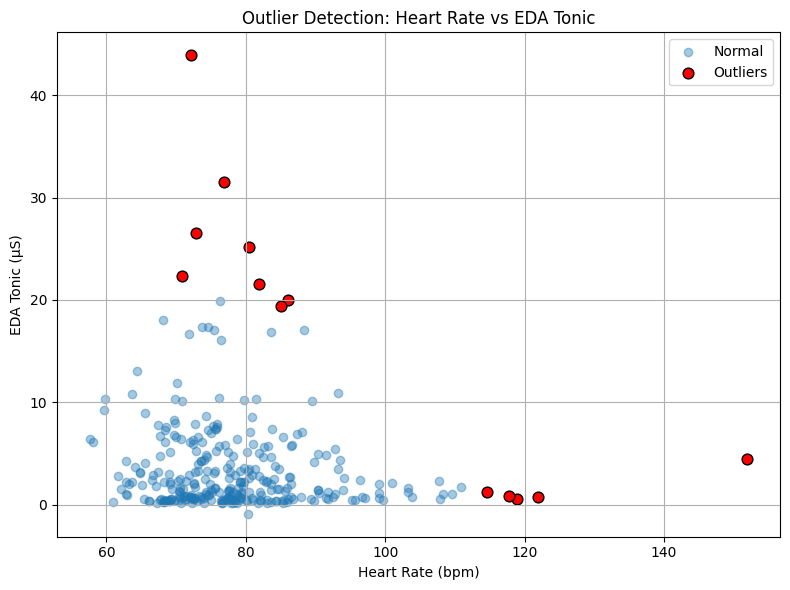

In [ ]:
features = ['HR_TD_Mean','EDA_TD_T_Mean']
X = df_clean[features].values
mean = X.mean(axis=0)
cov = np.cov(X, rowvar=False)
inv_cov = np.linalg.inv(cov)
dists = np.array([mahalanobis(x, mean, inv_cov) for x in X])
threshold = np.sqrt(chi2.ppf(0.99, df=len(features)))
df_clean['outlier_mah'] = dists > threshold

normal = df_clean[~df_clean['outlier_mah']]
outliers = df_clean[df_clean['outlier_mah']]

plt.figure(figsize=(8,6))
plt.scatter(normal['HR_TD_Mean'], normal['EDA_TD_T_Mean'], alpha=0.4, label='Normal')
plt.scatter(outliers['HR_TD_Mean'], outliers['EDA_TD_T_Mean'],
            color='red', edgecolors='k', s=60, label='Outliers')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('EDA Tonic (µS)')
plt.title('Outlier Detection: Heart Rate vs EDA Tonic')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

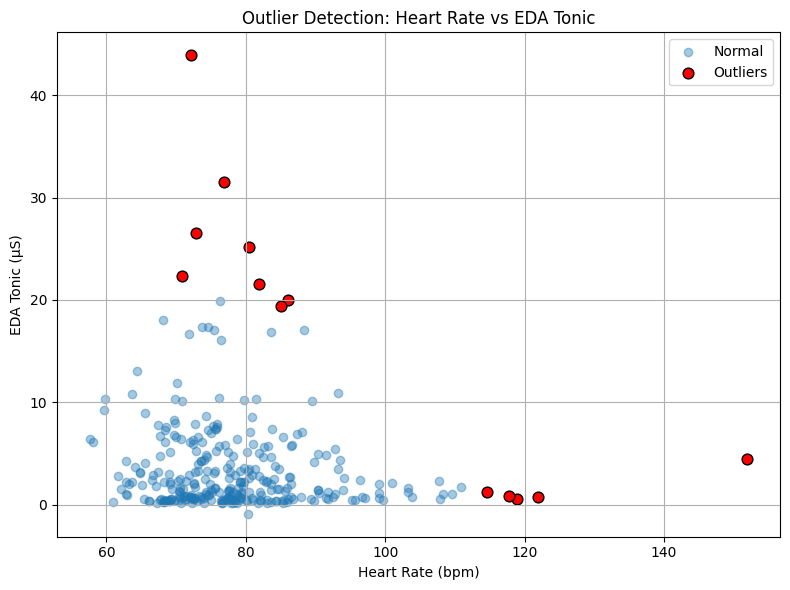

In [ ]:
normal = df_clean[~df_clean['outlier_mah']]
outliers = df_clean[df_clean['outlier_mah']]

plt.figure(figsize=(8, 6))
plt.scatter(normal['HR_TD_Mean'], normal['EDA_TD_T_Mean'],
            alpha=0.4, label='Normal')
plt.scatter(outliers['HR_TD_Mean'], outliers['EDA_TD_T_Mean'],
            color='red', edgecolors='k', s=60, label='Outliers')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('EDA Tonic (µS)')
plt.title('Outlier Detection: Heart Rate vs EDA Tonic')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Make easy-to-read sequence of emotional “states,” to identify exactly when and how participants move from low aroused states to higher aroused states in the different cohorts.

In [ ]:
def prepare_cohort(df, state_features, cohort):
    df_cohort = df[df['Cohort_combined'] == cohort]
    df_states = df_cohort.dropna(subset=state_features).reset_index(drop=True)
    X = df_states[state_features].values

    n_inds = df_cohort['Individual'].nunique()

    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    return X_scaled, scaler, n_inds, df_states

In [ ]:
def select_k_and_plot(X_scaled, ks=range(1, 11), random_state=42, title=None):
    bics = []
    for k in ks:
        gm = GaussianMixture(n_components=k, random_state=random_state).fit(X_scaled)
        bic = gm.bic(X_scaled)
        bics.append(bic)

    ks_list = list(ks)
    best_k = ks_list[int(np.argmin(bics))]

    plt.figure(figsize=(6, 3))
    plt.plot(ks_list, bics, marker='o', linestyle='-')
    plt.axvline(best_k, color='gray', linestyle='--', label=f'Best k = {best_k}')
    plt.title(title or "BIC vs. Number of Components")
    plt.xlabel("Number of components (k)")
    plt.ylabel("BIC")
    plt.xticks(ks_list)
    plt.legend(fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_k, bics


In [ ]:
def analyze_states(X_scaled, scaler, state_features, k, df_states,
                   dp_components=10, dp_alpha=0.5, random_state=42,
                   cohort_label=None):
    header = f"=== Cohort {cohort_label} ===" if cohort_label else "=== GMM Analysis ==="
    print("\n" + header)
    print(f"Using finite GMM with k={k}, plus DP‐GMM")

    gmm = GaussianMixture(n_components=k, random_state=random_state).fit(X_scaled)
    bgm = BayesianGaussianMixture(
        n_components=dp_components,
        weight_concentration_prior_type='dirichlet_process',
        weight_concentration_prior=dp_alpha,
        random_state=random_state
    ).fit(X_scaled)

    results = {'cohort': cohort_label, 'k': k}

    gmm_labels = gmm.predict(X_scaled)
    df_states['State_GMM_BIC'] = gmm_labels
    dp_labels  = bgm.predict(X_scaled)
    results['counts'] = {
        f'GMM_k{k}':  pd.Series(gmm_labels).value_counts().sort_index(),
        'DP-GMM':     pd.Series(dp_labels ).value_counts().sort_index()
    }

    results['centroids'] = {
        f'GMM_k{k}': pd.DataFrame(
                         scaler.inverse_transform(gmm.means_),
                         columns=state_features,
                         index=[f"State {i}" for i in range(k)]
                     ),
        'DP-GMM':    pd.DataFrame(
                         scaler.inverse_transform(bgm.means_),
                         columns=state_features,
                         index=[f"State {i}" for i in range(bgm.means_.shape[0])]
                     )
    }

    return results, df_states['State_GMM_BIC'], gmm

In [ ]:
def plot_state_sequence_heatmap(
    df: pd.DataFrame,
    state_col: str,
    merge_map: dict = None,
    round_col: str = 'Round',
    phase_col: str = 'Phase',
    round_map: dict = None,
    phase_map: dict = None,
    figsize: tuple = (12, 6)
) -> pd.DataFrame:
    df = df.copy()
    if merge_map:
        df['_plot_label'] = df[state_col].map(merge_map)
        plot_col = '_plot_label'
    else:
        plot_col = state_col

    if round_map is None:
        round_map = {f'round_{i}': float(i) for i in range(1, 5)}
    if phase_map is None:
        phase_map = {f'phase{i}': 0.1 * i for i in (1, 2, 3)}

    seq = df[['Individual', round_col, phase_col, plot_col]].copy()
    seq['TimeIdx'] = seq[round_col].map(round_map) + seq[phase_col].map(phase_map)

    labels = pd.unique(seq[plot_col].dropna())
    state_order = list(labels)

    lut = {label: float(i) for i, label in enumerate(state_order)}
    seq['StateCode'] = seq[plot_col].map(lut)

    pivot = seq.pivot(index='Individual', columns='TimeIdx', values='StateCode')

    plt.figure(figsize=figsize)
    colors = [sns.color_palette('tab10')[i] for i in range(len(state_order))]
    sns.heatmap(
        pivot,
        cmap=colors,
        cbar_kws={'ticks': list(lut.values()), 'label': state_col},
        linewidths=0.5,
        linecolor='lightgray',
        mask=pivot.isna()
    )
    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticklabels(state_order)

    plt.title(f"State Sequence Heatmap ({state_col})")
    plt.xlabel('Time (Round.Phase)')
    plt.ylabel('Individual')
    plt.tight_layout()
    plt.show()

    if merge_map:
        df.drop(columns=['_plot_label'], inplace=True)

    return pivot

In [ ]:
state_features = [
    'HR_TD_Mean','TEMP_TD_Mean','EDA_TD_P_Mean','EDA_TD_T_Mean',
    'Frustrated','upset','hostile','alert','ashamed',
    'inspired','nervous','attentive','afraid','active','determined'
]

In [ ]:
X_scaled, scaler, n_inds, df_states = prepare_cohort(df_clean, state_features, 'D1_1')
print(f"\nUnique individuals in D1_1: {n_inds}")


Unique individuals in D1_1: 8


In [ ]:
X_scaled_1_2, scaler_1_2, n_inds_1_2, df_states_1_2 = prepare_cohort(df_clean, state_features, 'D1_2')
print(f"\nUnique individuals in D1_2: {n_inds_1_2}")


Unique individuals in D1_2: 6


In [ ]:
X_scaled_1_3, scaler_1_3, n_inds_1_3, df_states_1_3 = prepare_cohort(df_clean, state_features, 'D1_3')
print(f"\nUnique individuals in D1_3: {n_inds_1_3}")


Unique individuals in D1_3: 12


select_k_and_plot function tries out different numbers of clusters (from 1 up to 10 by default), fitting a GMM each time and scoring how well it balances fit versus complexity using the BIC.

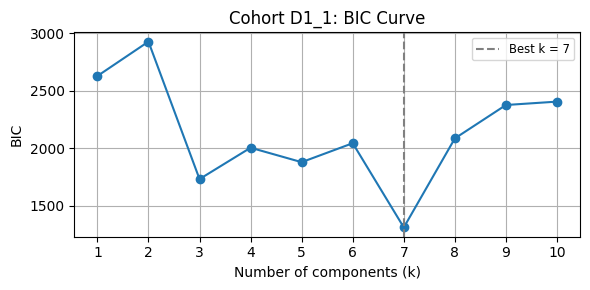

Best k by BIC: 7


In [ ]:
best_k, bic_curve = select_k_and_plot(
    X_scaled,
    ks=range(1, 11),
    random_state=42,
    title="Cohort D1_1: BIC Curve"
)

print("Best k by BIC:", best_k)

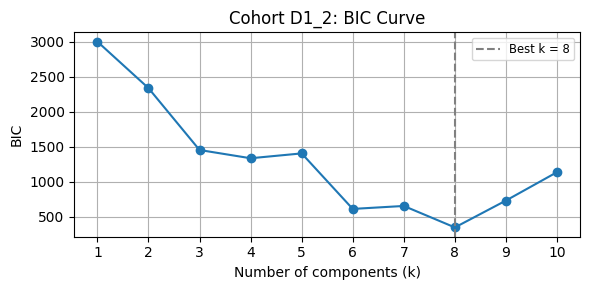

Best k by BIC: 8


In [ ]:
best_k_1_2, bic_curve_1_2 = select_k_and_plot(
    X_scaled_1_2,
    ks=range(1, 11),
    random_state=42,
    title="Cohort D1_2: BIC Curve"
)

print("Best k by BIC:", best_k_1_2)

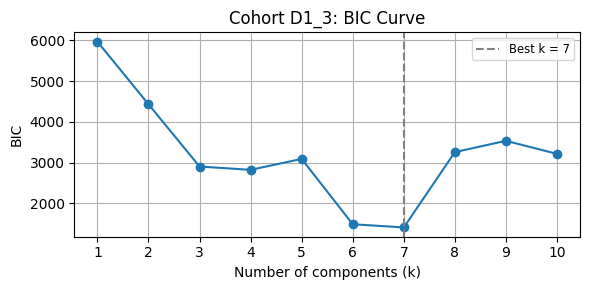

Best k by BIC: 7


In [ ]:
best_k_1_3, bic_curve_1_3 = select_k_and_plot(
    X_scaled_1_3,
    ks=range(1, 11),
    random_state=42,
    title="Cohort D1_3: BIC Curve"
)

print("Best k by BIC:", best_k_1_3)

analyze_states function runs two clustering algorithms on the scaled data—one with a fixed number of clusters and one that figures out how many clusters to keep.
Each sample gets a cluster label, the labels are saved back into the DataFrame, and the function counts how many samples end up in each cluster.
Finally, it reverses the scaling, calculates the average feature values for each cluster, and returns both the cluster sizes and centroids to tell conditional and emotional scores.

In [ ]:
res, gmm_labels, gmm = analyze_states(
    X_scaled, scaler, state_features,
    k=best_k,
    df_states=df_states,
    dp_components=10,
    dp_alpha=0.5,
    cohort_label='D1_1'
)

df_states['State_GMM_BIC'] = gmm_labels

print(res['counts']['GMM_k7'])
print(res['centroids']['GMM_k7'])



=== Cohort D1_1 ===
Using finite GMM with k=7, plus DP‐GMM
0    43
1    12
2    12
3     3
4     3
5     7
6    12
Name: count, dtype: int64
         HR_TD_Mean  TEMP_TD_Mean  EDA_TD_P_Mean  EDA_TD_T_Mean  Frustrated  \
State 0   78.290433     32.118819       0.027110       0.708857    2.046512   
State 1   73.244293     33.132365       0.028674       1.488993    2.333333   
State 2   72.806434     30.716503       0.015234       0.441106    4.583333   
State 3   79.802604     32.949707       0.278338       3.545399    6.000000   
State 4   79.819545     32.457371       0.010465       0.621436    4.666667   
State 5   73.205723     30.805904       0.014487       0.611707    1.142857   
State 6   75.166566     33.508841       0.087714       1.958309    3.250000   

            upset   hostile     alert   ashamed  inspired   nervous  \
State 0  1.000000  1.000000  2.046512  1.093023  2.000000  1.488372   
State 1  1.666667  1.000000  1.250000  1.250000  1.500000  1.250000   
State 2  1.6

| State | Count | Interpretation                                                                                                                                                            |
| :---: | :---: | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
|   0   |   43  | **Balanced engagement:** Moderately alert, attentive, active, and determined; very low upset, hostile, ashamed, and afraid—suggests a steady, neutral task‐focused state. |
|   1   |   12  | **Calm purpose:** Low alertness, inspiration, and activity but moderate frustration and determination—quiet but goal‐directed.                                            |
|   2   |   12  | **Productive tension:** High frustration, activity, and attentiveness; moderate alertness, inspiration, and determination; minimal hostility or nervousness.              |
|   3   |   3   | **Distressed focus:** Very high frustration and shame with moderate alertness and inspiration—engaged yet emotionally strained.                                           |
|   4   |   3   | **Energized stress:** High across frustration, upset, alertness, attentiveness, activity, and determination; some shame—driven but negatively aroused.                    |
|   5   |   7   | **Subdued baseline:** Uniformly low on all emotions—minimal arousal or engagement, a restful/calm state.                                                                  |
|   6   |   12  | **Goal‐driven calm:** Above‐average determination, attentiveness, activity, and inspiration with moderate frustration; little hostility or fear—focused optimism.         |


In [ ]:
res_1_2, gmm_labels_1_2, gmm_1_2 = analyze_states(
    X_scaled_1_2, scaler_1_2, state_features,
    k=best_k_1_2,
    df_states=df_states_1_2,
    dp_components=10,
    dp_alpha=0.5,
    cohort_label='D1_2'
)

df_states_1_2['State_GMM_BIC'] = gmm_labels_1_2

print(res_1_2['counts']['GMM_k8'])
print(res_1_2['centroids']['GMM_k8'])


=== Cohort D1_2 ===
Using finite GMM with k=8, plus DP‐GMM
0    21
1     5
2     8
3    11
4     4
5     9
6     6
7     8
Name: count, dtype: int64
         HR_TD_Mean  TEMP_TD_Mean  EDA_TD_P_Mean  EDA_TD_T_Mean  Frustrated  \
State 0   71.868632     34.733656       0.387953       6.666880    0.809524   
State 1   77.521626     35.272203       1.344588      16.431059    4.800000   
State 2   76.548765     34.232470       1.535419      13.736396    1.750000   
State 3   85.015254     35.053493       5.187184       7.790316    1.272727   
State 4   87.140861     34.709837       1.023074       2.582089    3.000000   
State 5   71.877903     35.193716       0.736333      21.536659    0.666667   
State 6   76.627361     35.098242       1.209185       5.817301    6.000000   
State 7   71.877277     35.015748       0.474325       6.506390    0.250000   

            upset   hostile     alert   ashamed  inspired   nervous  \
State 0  1.047619  1.000000  1.428571  1.095238  1.571429  1.142857

| State | Count | Interpretation                                                                                                                               |
| :---: | :---: | :------------------------------------------------------------------------------------------------------------------------------------------- |
|   0   |   21  | **Moderate calm engagement:** Low frustration/upset; moderate alertness, attentiveness, activity & determination—steady, low-tension focus.  |
|   1   |   5   | **Stressed focus:** High frustration & upset with strong attentiveness, activity & determination—stressful but goal-oriented.                |
|   2   |   8   | **Motivated tension:** Elevated determination, attentiveness & inspiration with moderate frustration & nervousness—driven yet a bit anxious. |
|   3   |   11  | **Low-arousal baseline:** Uniformly low across all emotions—restful or disengaged state.                                                     |
|   4   |   4   | **High-arousal stress mobilization:** Very high alertness, attentiveness, activity & determination, with notable frustration & shame.        |
|   5   |   9   | **Subdued baseline:** Very low on nearly every emotion—minimal engagement or arousal.                                                        |
|   6   |   6   | **Intense frustrated drive:** Extreme frustration paired with high attentiveness, activity & determination—strong but tense push.            |
|   7   |   8   | **Calm determined engagement:** Low negative affect with high attentiveness, activity, determination & inspiration—focused yet relaxed.      |


In [ ]:
res_1_3, gmm_labels_1_3, gmm_1_3 = analyze_states(
    X_scaled_1_3, scaler_1_3, state_features,
    k=best_k_1_3,
    df_states=df_states_1_3,
    dp_components=10,
    dp_alpha=0.5,
    cohort_label='D1_3'
)

df_states_1_3['State_GMM_BIC'] = gmm_labels_1_3

print(res_1_3['counts']['GMM_k7'])
print(res_1_3['centroids']['GMM_k7'])


=== Cohort D1_3 ===
Using finite GMM with k=7, plus DP‐GMM
0    19
1    48
2     8
3    37
4     5
5    18
6     8
Name: count, dtype: int64
         HR_TD_Mean  TEMP_TD_Mean  EDA_TD_P_Mean  EDA_TD_T_Mean  Frustrated  \
State 0   84.174719     34.090191       0.207029       6.233005    0.421062   
State 1   79.021098     31.805062       0.111568       1.792972    1.962712   
State 2   79.658489     30.583129       0.013036       0.556621    1.875000   
State 3   87.638002     32.478812       0.073695       1.302613    1.092754   
State 4   75.649286     32.615986       0.396918       3.477025    5.200000   
State 5   76.711846     32.451393       0.288426       4.254154    1.222222   
State 6   77.515034     32.212162       0.161968       2.070969    5.000000   

            upset  hostile     alert   ashamed  inspired   nervous  attentive  \
State 0  1.105266      1.0  1.736859  1.000000  1.999977  1.263164   2.052610   
State 1  1.227222      1.0  1.991482  1.000000  1.920057  1.289

| State | Count | Interpretation                                                                                                                                                            |
| :---: | :---: | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **0** |   19  | **Low-tension determined engagement:** Very low frustration, upset, shame, hostility & fear; moderate alertness, attentiveness & activity; high determination.            |
| **1** |   48  | **Steady focused engagement:** Medium frustration & alertness; low shame/hostility/fear; high attentiveness & determination—calm but purpose-driven.                      |
| **2** |   8   | **Energized tension:** Moderate frustration & nervousness; high alertness, attentiveness, activity & determination; elevated inspiration—driven yet slightly anxious.     |
| **3** |   37  | **Positive high-arousal engagement:** Minimal negative affect with very high alertness, inspiration, attentiveness, activity & determination—optimistic peak focus.       |
| **4** |   5   | **Stress mobilization:** Very high frustration with high alertness, attentiveness, activity & determination; moderate upset & shame—activated by stress.                  |
| **5** |   18  | **Inspirational drive:** Low frustration/upset/shame; very high alertness, attentiveness, activity, determination & inspiration; moderate nervousness—positively charged. |
| **6** |   8   | **Frustrated push:** Extreme frustration; high alertness, attentiveness & determination; moderate upset, shame & nervousness—a tense but forceful state.                  |


Grouping raw GMM clusters into four or five human-readable tiers:

In [ ]:
merge_map = {
    1: 'Baseline',
    5: 'Baseline',
    0: 'Mild-Arousal',
    6: 'Engaged',
    2: 'High-Stress',
    3: 'High-Stress',
    4: 'High-Stress'
}

In [ ]:
merge_map_1_2 = {
    0: 'Baseline',
    1: 'High-Stress',
    2: 'Engaged',
    3: 'EDA-Artifact',
    4: 'Engaged',
    5: 'EDA-Artifact',
    6: 'High-Stress',
    7: 'Mild-Arousal'
}

In [ ]:
merge_map_1_3 = {
    0: 'Baseline',
    1: 'Baseline',
    2: 'Baseline',
    3: 'Engaged',
    4: 'High-Stress',
    5: 'Engaged',
    6: 'High-Stress'
}

These heatmaps demonstrate different rounds and phases across cohorts, showing how each individual’s state evolves from the pre-puzzle phase into the puzzle phase and then into rest. They reveal a consistent three-stage pattern—baseline before puzzles, heightened engagement during puzzles, and a return toward baseline during rest—repeated across all rounds in most cases.

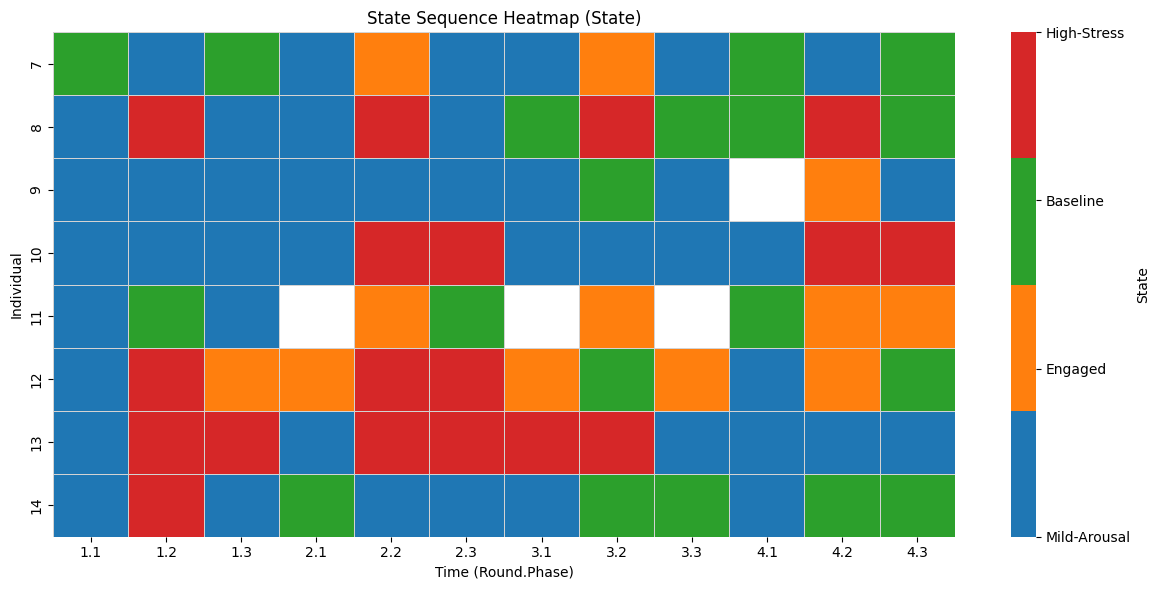

In [ ]:
df_states['State'] = df_states['State_GMM_BIC'].map(merge_map)

pivot = plot_state_sequence_heatmap(
    df_states,
    state_col='State',
    merge_map=None,
    round_map={
        'round_1': 1.0, 'round_2': 2.0,
        'round_3': 3.0, 'round_4': 4.0
    },
    phase_map={'phase1':0.1,'phase2':0.2,'phase3':0.3}
)

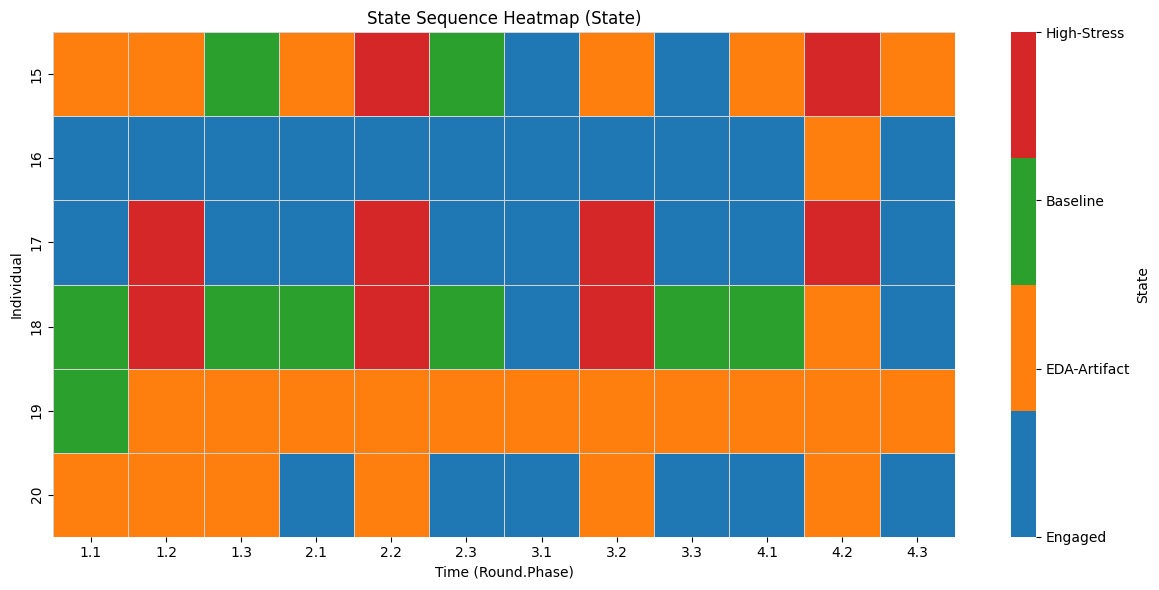

In [ ]:
df_states_1_2['State'] = df_states_1_2['State_GMM_BIC'].map(merge_map_D1_2_without_outliers)

pivot = plot_state_sequence_heatmap(
    df_states_1_2,
    state_col='State',
    merge_map=None,
    round_map={
        'round_1': 1.0, 'round_2': 2.0,
        'round_3': 3.0, 'round_4': 4.0
    },
    phase_map={'phase1':0.1,'phase2':0.2,'phase3':0.3}
)

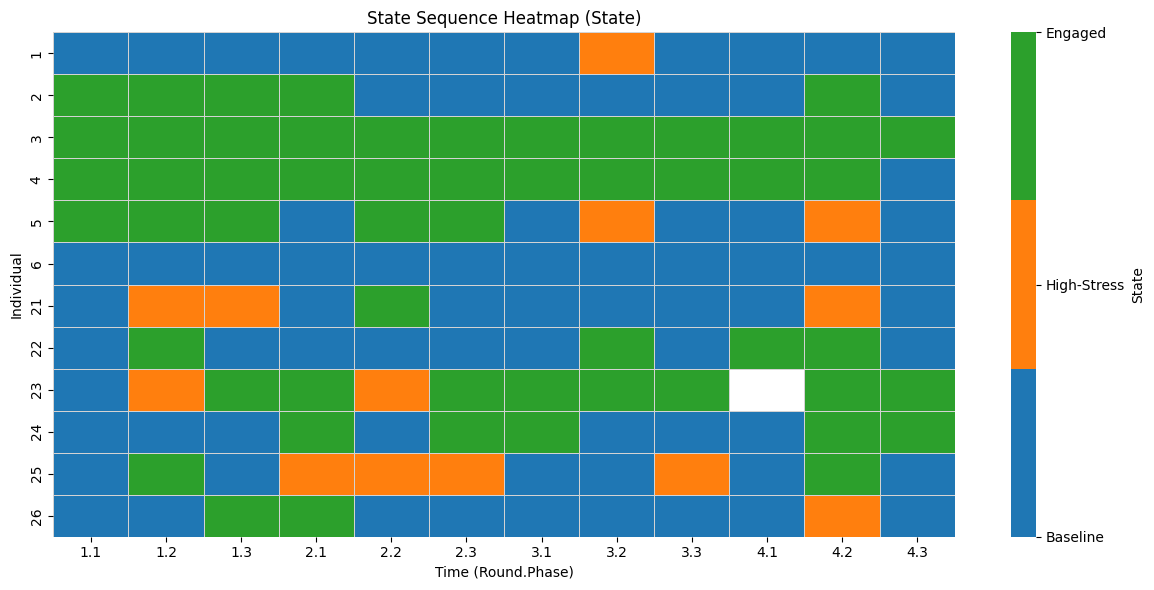

In [ ]:
df_states_1_3['State'] = df_states_1_3['State_GMM_BIC'].map(merge_map_1_3)

pivot = plot_state_sequence_heatmap(
    df_states_1_3,
    state_col='State',
    merge_map=None,
    round_map={
        'round_1': 1.0, 'round_2': 2.0,
        'round_3': 3.0, 'round_4': 4.0
    },
    phase_map={'phase1':0.1,'phase2':0.2,'phase3':0.3}
)

# Can we cluster participants' physiological responses into emotional "states"?

Use physiological features only (HR, TEMP, EDA) to cluster the responses, and then analyze whether those clusters show distinct emotional states (based on self-reported emotion ratings like frustrated, nervous, alert, etc.).

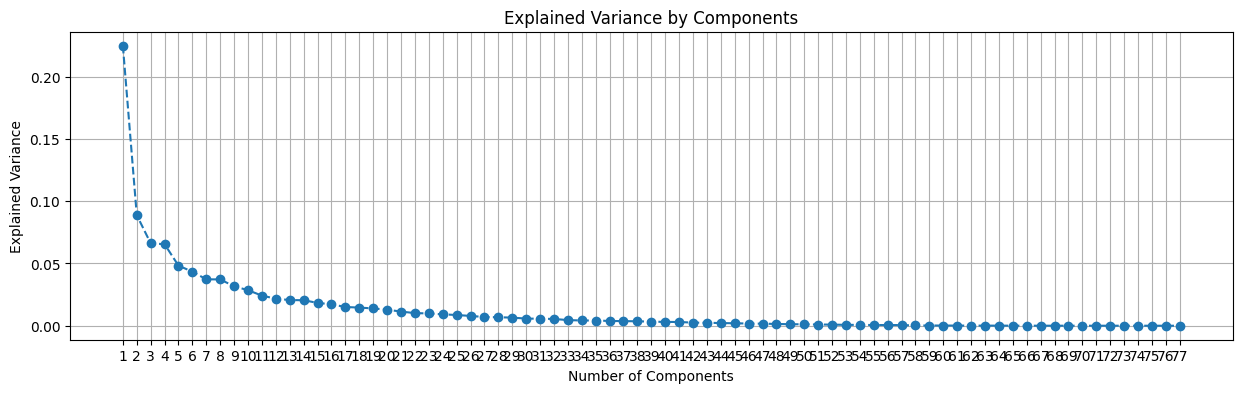

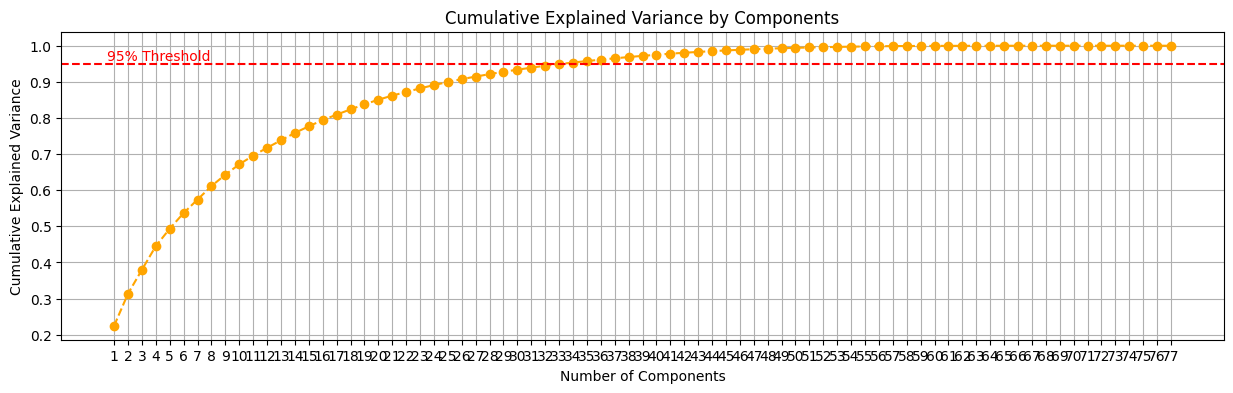

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df)

# Explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plotting the explained variance and cumulative variance

# Explained variance plot
plt.figure(figsize=(15, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(15, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange', linestyle='--')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='--')  # Threshold line for 95%
plt.text(0.5, 0.95, '95% Threshold', color='red', fontsize=10, verticalalignment='bottom')
plt.grid(True)
plt.show()

In [ ]:
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1
df_reduced = df_pca[:, :num_components]

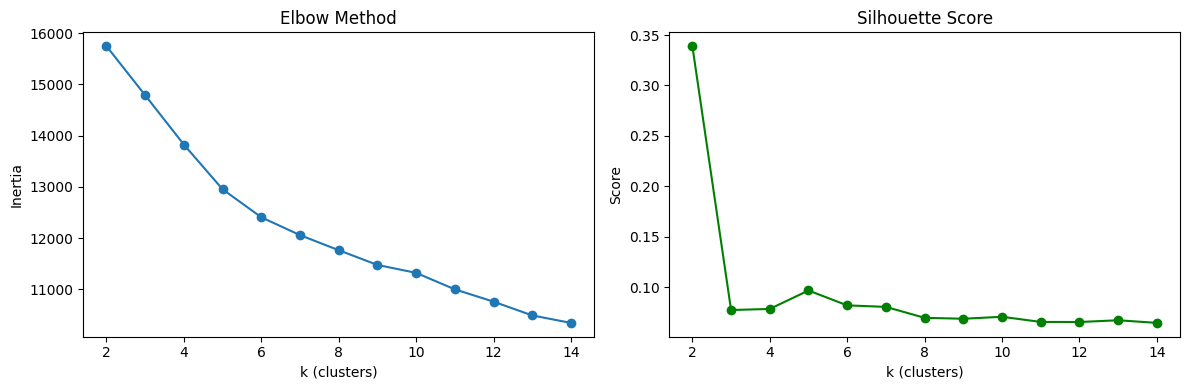

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_reduced)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(df_reduced, labels))

# Elbow & Silhouette plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'o-')
plt.title("Elbow Method")
plt.xlabel("k (clusters)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, 'o-', color='green')
plt.title("Silhouette Score")
plt.xlabel("k (clusters)")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

In [ ]:
# Final k = 2 based on plot, fit model
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster = df.copy()
df_cluster['Cluster'] = kmeans.fit_predict(df_reduced)


Mean Emotion Ratings by Cluster:
         Frustrated     upset   hostile     alert   ashamed  inspired  \
Cluster                                                                 
0          0.001618 -0.025092 -0.044925  0.031127 -0.030040  0.050673   
1         -0.011453  0.177628  0.318024 -0.220346  0.212649 -0.358709   

          nervous  attentive    afraid    active  determined  
Cluster                                                       
0       -0.008158   0.039334  0.010437  0.041562    0.039587  
1        0.057751  -0.278442 -0.073886 -0.294215   -0.280232  


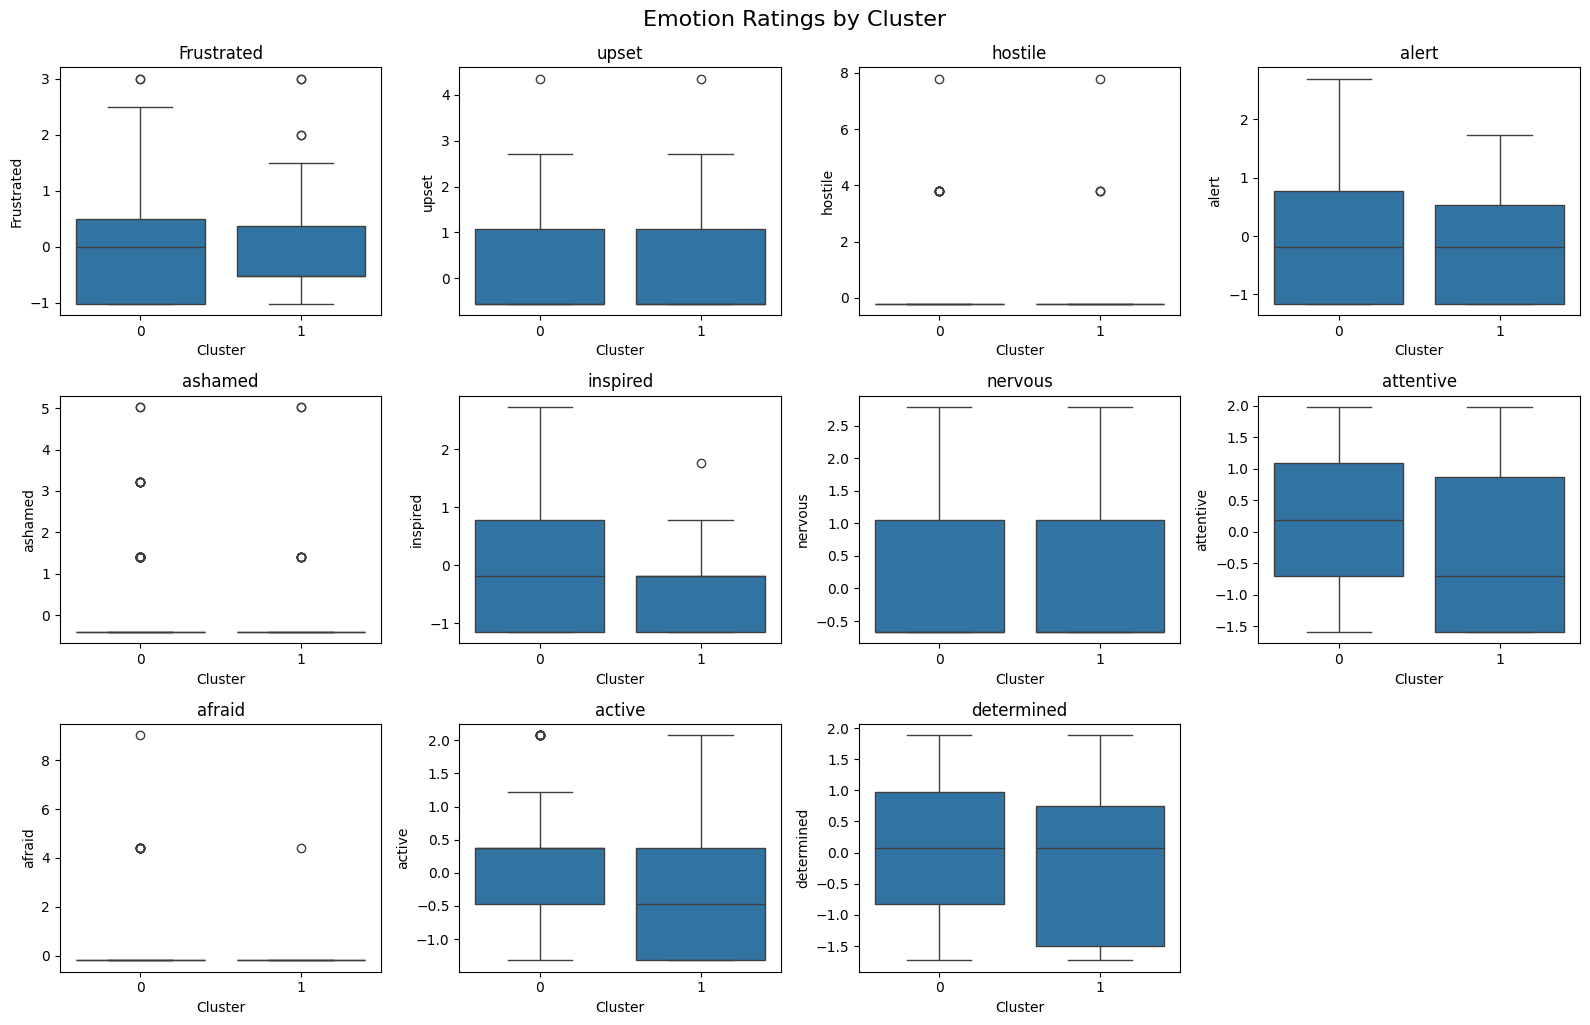

In [ ]:
import seaborn as sns

emotion_cols = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

cluster_summary = df_cluster.groupby('Cluster')[emotion_cols].mean()

print("\nMean Emotion Ratings by Cluster:")
print(cluster_summary)

# Visualize emotion score distributions by cluster
plt.figure(figsize=(16, 10))
for i, col in enumerate(emotion_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df_cluster, x='Cluster', y=col)
    plt.title(f"{col}")
    plt.tight_layout()
plt.suptitle("Emotion Ratings by Cluster", fontsize=16, y=1.02)
plt.show()

## Interpretation

**Cluster 0**

| Emotion       | Mean Diff  | Interpretation |
|---------------|------------|----------------|
| **Frustrated** | +0.0016   | ~Neutral (very small) |
| **Upset**      | -0.0251   | Slightly calmer |
| **Hostile**    | -0.0449   | Slightly calmer |
| **Alert**      | +0.0311   | Slightly more alert |
| **Ashamed**    | -0.0300   | Slightly less ashamed |
| **Inspired**   | **+0.0507** | Slightly more inspired |
| **Nervous**    | -0.0082   | Near neutral |
| **Attentive**  | **+0.0393** | More attentive |
| **Afraid**     | +0.0104   | Near neutral |
| **Active**     | **+0.0416** | More active |
| **Determined** | **+0.0396** | More determined |

This group shows more cognitive engagement and slightly positive arousal — alert, attentive, inspired, active, determined — and not very nervous, hostile, or afraid.

This cluster can be interpreted as:

“Engaged & Stable” emotional state — focused, alert, but not distressed.

**Cluster 1**

| Emotion       | Mean Diff   | Interpretation |
|---------------|-------------|----------------|
| **Frustrated** | -0.0115    | Slightly lower |
| **Upset**      | **+0.1776** | More upset |
| **Hostile**    | **+0.3180** | More hostile |
| **Alert**      | -0.2203    | Less alert |
| **Ashamed**    | **+0.2126** | More ashamed |
| **Inspired**   | **-0.3587** | Much less inspired |
| **Nervous**    | **+0.0578** | Slightly more nervous |
| **Attentive**  | **-0.2784** | Less attentive |
| **Afraid**     | **-0.0739** | Slightly less afraid |
| **Active**     | **-0.2942** | Less active |
| **Determined** | **-0.2802** | Less determined |

This group shows higher negative emotions (upset, hostile, ashamed) and lower positive energy (inspired, attentive, determined). Not necessarily panicked, but withdrawn, hostile, disengaged.

This cluster can be interpreted as:

“Stressed & Disengaged” emotional state — more negative affect and less focus.

## Conclusion

K-means clustering on physiological signals alone identifies two distinct emotional states across participants. These clusters align with self-reported emotional patterns: Cluster 0 reflects an “Engaged & Stable” state — marked by higher attentiveness, activity, and inspiration with minimal distress — while Cluster 1 represents a “Stressed & Disengaged” state — characterized by increased hostility, upset, and shame, with reduced alertness and motivation. This suggests that unsupervised clustering is capable of uncovering latent affective states from physiological data.

In [ ]:
# Use-case - real-time emotion detection and adaptive systems

new_data = df.sample(n=10, random_state=1) # Pseudo-random data samples
new_data_pca = pca.transform(new_data)[:, :num_components]

# Assign to nearest cluster
new_clusters = kmeans.predict(new_data_pca)
new_clusters

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

# Do physiological patterns differ between experiment phases (rest, stress, recovery)?

We are aiming to understand whether different phases of the experiment (phase1 = pre-puzzle/rest, phase2 = puzzle/stress, phase3 = post-puzzle/recovery) correlate with different physiological-emotional states, as revealed by unsupervised clusters.

In [ ]:
# Collapse one-hot encoded phases into a single categorical 'Phase' column
phase_cols = ['Phase_phase1', 'Phase_phase2', 'Phase_phase3']

def resolve_phase(row):
    for col in phase_cols:
        if row[col] == 1:
            return col.replace('Phase_', '')  # e.g., 'phase1'
    return 'unknown'

df_phase = df_cluster.copy()
df_phase['Phase'] = df_phase.apply(resolve_phase, axis=1)

In [ ]:
# Count how many data points fall into each cluster per phase
cluster_phase_counts = pd.crosstab(df_phase['Phase'], df_phase['Cluster'], normalize='index')  # % per phase
print("\nProportion of Clusters per Phase:")
print(cluster_phase_counts)


Proportion of Clusters per Phase:
Cluster         0         1
Phase                      
phase1   0.890000  0.110000
phase2   0.855769  0.144231
phase3   0.883495  0.116505


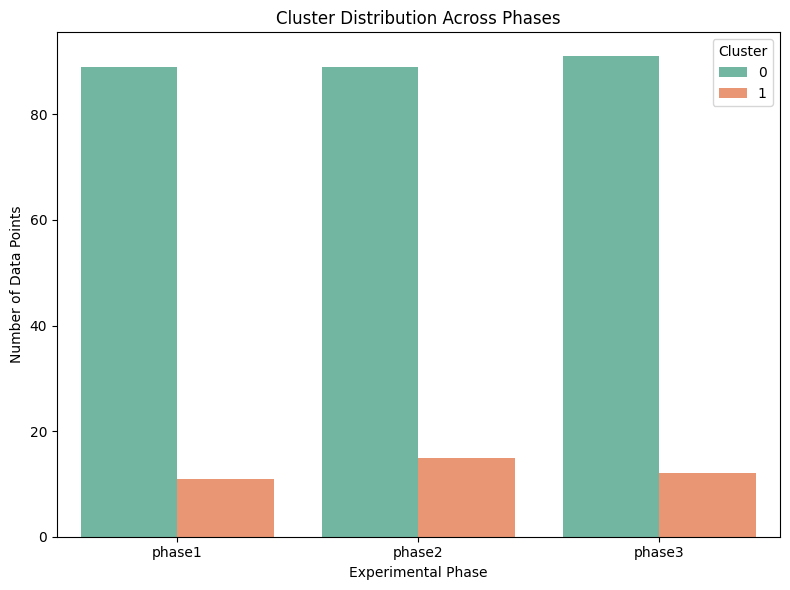

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to long format for seaborn
cluster_phase_long = df_phase.groupby(['Phase', 'Cluster']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_phase_long, x='Phase', y='Count', hue='Cluster', palette='Set2')
plt.title("Cluster Distribution Across Phases")
plt.ylabel("Number of Data Points")
plt.xlabel("Experimental Phase")
plt.tight_layout()
plt.show()

Observations:

* Cluster 0 (Engaged & Stable) is the dominant cluster in all phases, suggesting that most participants maintained a relatively focused and calm emotional state throughout.

* There is a slight increase in the proportion of Cluster 1 (Stressed & Disengaged) during the stress phase (phase2).

* After the stress phase, the proportion of Cluster 1 decreases again in the recovery phase (phase3), suggesting partial recovery or emotional stabilization.

In [ ]:
emotion_means_by_phase = df_phase.groupby('Phase')[emotion_cols].mean()
print("\nAverage Emotion Ratings by Phase:")
print(emotion_means_by_phase)


Average Emotion Ratings by Phase:
        Frustrated     upset   hostile     alert   ashamed  inspired  \
Phase                                                                  
phase1   -0.498672 -0.423212 -0.168563 -0.194943 -0.226070 -0.131571   
phase2    0.592258  0.531054  0.253210  0.482612  0.324530  0.267540   
phase3   -0.113861 -0.125324 -0.092015 -0.298032 -0.108195 -0.142399   

         nervous  attentive    afraid    active  determined  
Phase                                                        
phase1  0.142308  -0.165470  0.035284 -0.320137   -0.104221  
phase2  0.111080   0.510456  0.070740  0.612962    0.432869  
phase3 -0.250321  -0.354761 -0.105683 -0.308100   -0.335885  


## Interpretation

**Phase 1**

| Emotion     | Score | Interpretation |
|-------------|--------|----------------|
| Frustrated  | **-0.50** | Clearly less frustrated than average |
| Upset       | **-0.42** | Less upset |
| Hostile     | **-0.17** | Less hostile |
| Alert       | **-0.19** | Slightly less alert |
| Ashamed     | **-0.23** | Less ashamed |
| Inspired    | **-0.13** | Slightly uninspired |
| Nervous     | +0.14 | Slightly more nervous (interesting) |
| Attentive   | **-0.17** | Less focused |
| Afraid      | +0.04 | About average |
| Active      | **-0.32** | Clearly less active |
| Determined  | **-0.10** | Mildly less determined |

This is a low-arousal, low-negative-emotion state. The participant is calm, slightly disengaged, with mild nervousness possibly due to anticipation.

**Phase 2**

| Emotion     | Score | Interpretation |
|-------------|--------|----------------|
| Frustrated  | **+0.59** | Highly frustrated |
| Upset       | **+0.53** | Highly upset |
| Hostile     | **+0.25** | More aggressive emotion |
| Alert       | **+0.48** | More alert and activated |
| Ashamed     | **+0.32** | More self-conscious |
| Inspired    | +0.27 | Mildly inspired (competitive arousal?) |
| Nervous     | +0.11 | Mildly more nervous |
| Attentive   | **+0.51** | Much more focused |
| Afraid      | +0.07 | Slightly more afraid |
| Active      | **+0.61** | Much more active/energized |
| Determined  | **+0.43** | Much more driven/determined |

This is a high-arousal, high-negative-affect state — frustration, hostility, and activation are all increased. But also increased focus and determination, suggesting engaged stress, not panic.

**Phase 3**

| Emotion     | Score | Interpretation |
|-------------|--------|----------------|
| Frustrated  | **-0.11** | Below baseline frustration |
| Upset       | **-0.13** | Mild recovery from upset |
| Hostile     | **-0.09** | Less hostile |
| Alert       | **-0.30** | Less alert — coming down from activation |
| Ashamed     | **-0.11** | Somewhat less ashamed |
| Inspired    | **-0.14** | Less inspired — emotionally flat |
| Nervous     | **-0.25** | Clearly less nervous |
| Attentive   | **-0.35** | Less focused |
| Afraid      | **-0.11** | Less fear |
| Active      | **-0.31** | Much less active |
| Determined  | **-0.34** | Clearly less driven |

This phase reflects emotional recovery: lower arousal, lower focus, and return to calm, but with signs of mental fatigue (low alertness, determination, attentiveness).

## Conclusion

The distribution of clusters across phases aligns with emotional patterns observed in the data. In Phase 1 (rest), participants showed low arousal and low negative emotion, with Cluster 0 ("Engaged & Stable") dominating (89%), indicating a calm baseline state. In Phase 2 (stress), emotions like frustration, upset, and alertness increased sharply, reflected in the highest proportion of Cluster 1 ("Stressed & Disengaged") at 14.4%—showing a stress-induced shift. In Phase 3 (recovery), most emotional levels decreased, though focus and drive also dropped, suggesting mental fatigue. The cluster distribution returned close to baseline.

These results confirm that emotional states change with task phase, showing stress responses and partial recovery.

# Do participants adapt as they do more rounds, or do they get more stressed (burnout)?

Assess the emotional state (via clusters) across puzzle rounds (1 → 4) to detect trends:
* Do participants shift from “Stressed” → “Calm” (adaptation)?
* Or from “Calm” → “Stressed” (burnout/fatigue)?

In [ ]:
df_puzzle = df_phase[df_phase['Phase'] == 'phase2'].copy()

# Assuming rounds are one-hot encoded: Round_round_1 ... Round_round_4
def resolve_round(row):
    for i in range(1, 5):
        if row.get(f'Round_round_{i}') == 1:
            return f'round_{i}'
    return 'unknown'

df_puzzle['Round'] = df_puzzle.apply(resolve_round, axis=1)

In [ ]:
# Distribution of emotional clusters per round
cluster_round_dist = pd.crosstab(df_puzzle['Round'], df_puzzle['Cluster'], normalize='index')
print("\nCluster Proportions per Round (Puzzle Phase Only):")
print(cluster_round_dist)


Cluster Proportions per Round (Puzzle Phase Only):
Cluster         0         1
Round                      
round_1  0.769231  0.230769
round_2  0.846154  0.153846
round_3  0.923077  0.076923
round_4  0.884615  0.115385


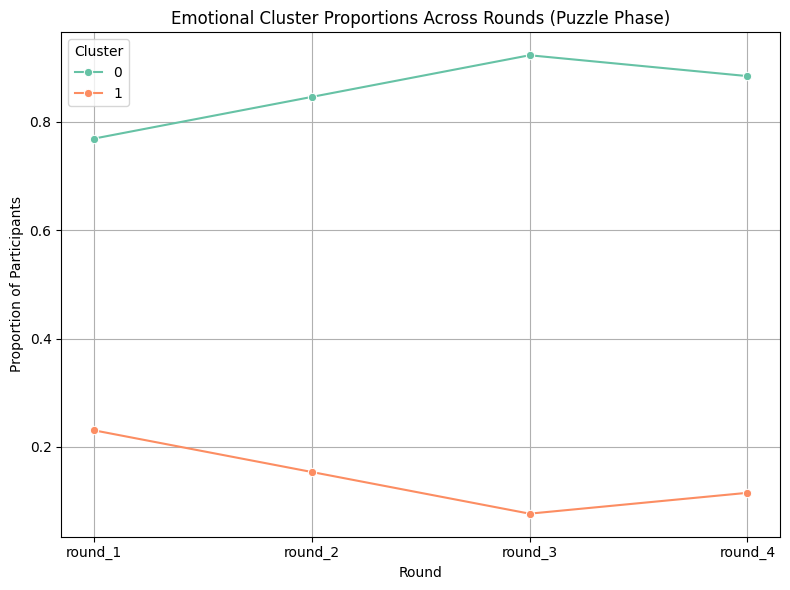

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to long format for plotting
cluster_round_long = df_puzzle.groupby(['Round', 'Cluster']).size().reset_index(name='Count')
total_per_round = df_puzzle.groupby('Round').size().reset_index(name='Total')
cluster_round_long = cluster_round_long.merge(total_per_round, on='Round')
cluster_round_long['Proportion'] = cluster_round_long['Count'] / cluster_round_long['Total']

plt.figure(figsize=(8, 6))
sns.lineplot(data=cluster_round_long, x='Round', y='Proportion', hue='Cluster', marker='o', palette='Set2')
plt.title("Emotional Cluster Proportions Across Rounds (Puzzle Phase)")
plt.ylabel("Proportion of Participants")
plt.xlabel("Round")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
emotion_by_round = df_puzzle.groupby('Round')[emotion_cols].mean()
print("\nMean Emotion Scores per Round (Puzzle Phase):")
print(emotion_by_round)


Mean Emotion Scores per Round (Puzzle Phase):
         Frustrated     upset   hostile     alert   ashamed  inspired  \
Round                                                                   
round_1    0.220372  0.326613  0.253210  0.658962  0.707859   0.11834   
round_2    0.626066  0.829852  0.099279  0.436204  0.568467   0.23024   
round_3    0.529472  0.326613 -0.054653  0.399078 -0.058799   0.34214   
round_4    0.993122  0.641138  0.715006  0.436204  0.080593   0.37944   

          nervous  attentive    afraid    active  determined  
Round                                                         
round_1  0.393460   0.467458  0.159382  0.572137    0.389415  
round_2  0.127691   0.673848  0.159382  0.506816    0.424178  
round_3 -0.005194   0.467458 -0.017902  0.604797    0.493704  
round_4 -0.071637   0.433060 -0.017902  0.768097    0.424178  


## Interpretation

**Negative Emotions (Frustrated, Upset, Hostile, Ashamed)**

| Emotion    | round_1 | round_2 | round_3 | round_4 | Interpretation |
|------------|---------|---------|---------|---------|----------------|
| Frustrated | +0.22   | +0.63   | +0.53   | **+0.99** | Clear increase → burnout signal |
| Upset      | +0.33   | +0.83   | +0.33   | +0.64   | Peaks in R2, stays high |
| Hostile    | +0.25   | +0.10   | -0.05   | **+0.72** | Drop in R3, **spike in R4** → loss of patience? |
| Ashamed    | +0.71   | +0.57   | -0.06   | +0.08   | Very high R1-R2, resolves by R3-R4 |

Frustration and hostility rise again in round 4, suggesting stress accumulation, not adaptation. Ashamed and upset show initial spikes and partial recovery.

**Positive Emotions (Inspired, Attentive, Determined, Active)**

| Emotion    | round_1 | round_2 | round_3 | round_4 | Interpretation |
|------------|---------|---------|---------|---------|----------------|
| Inspired   | +0.12   | +0.23   | +0.34   | **+0.38** | Growing sense of drive/engagement |
| Attentive  | +0.47   | **+0.67** | +0.47   | +0.43   | Peak in R2, stays elevated |
| Determined | +0.39   | +0.42   | **+0.49** | +0.42   | Remains stable and high |
| Active     | +0.57   | +0.51   | +0.60   | **+0.77** | Very high → growing energy or stress |

Participants remain highly active, determined, attentive, and inspired — there's no motivational drop, which argues against disengagement. Instead, it suggests persistent cognitive effort, possibly forced engagement despite rising stress.

**Arousal and Stress Signals (Nervous, Afraid, Alert)**

| Emotion | round_1 | round_2 | round_3 | round_4 | Interpretation |
|---------|---------|---------|---------|---------|----------------|
| Nervous | +0.39   | +0.13   | ~0      | -0.07   | Gradual **decrease** → adaptation |
| Afraid  | +0.16   | +0.16   | -0.02   | -0.02   | Early fear, fades |
| Alert   | +0.66   | +0.44   | +0.40   | +0.44   | High but stable — stays sharp |

Nervousness and fear gradually drop — possibly adaptation to stress exposure. But alertness remains high, showing participants stay focused.

## Conclusion

**Burnout**
* Frustration builds up over time, peaking in Round 4
* Hostility and active energy spike in R4 → possible agitation or fatigue
* No emotional calming despite repetition

**Adaptation**
* Nervousness and fear decline over rounds
* Ashamed emotion fades
* Positive emotions (inspired, attentive, determined) remain high or grow

We observe a complex dynamic: participants adapt physiologically to fear/stress, but frustration builds over time, likely due to task difficulty or fatigue — classic signs of cognitive strain under pressure.